In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency


In [115]:
df = pd.read_csv('https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/MBAN%206750%20HW/Employee_Attrition_Data_Set(1).csv')

In [116]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,Yes
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,No
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,No
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,No


In [118]:
# Convert Attrition_label to binary
df['Attrition_label'] = np.where(df['Attrition'] == 'Yes', 1, 0)

In [123]:
# Define the numeric features and the target variable
from scipy.stats import ttest_ind
numeric_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions',
                    'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
                    'Performance Rating']
target = 'Attrition'

# Convert 'Attrition' to binary numerical values
df[target] = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform t-tests for each numeric feature
t_test_results = []
for feature in numeric_features:
    no_attrition = df[df[target] == 0][feature]
    yes_attrition = df[df[target] == 1][feature]
    t_stat, p_value = ttest_ind(no_attrition, yes_attrition, equal_var=False)
    t_test_results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_value})

# Convert t-test results to DataFrame for better readability
t_test_df = pd.DataFrame(t_test_results)
print("T-test results for numeric features:\n", t_test_df)

T-test results for numeric features:
                  Feature  t-statistic       p-value
0                    Age    -1.270140  2.041909e-01
1         Monthly Income    -1.766782  7.742554e-02
2       Years at Company     5.779035  8.764614e-09
3   Number of Promotions     6.550883  7.303282e-11
4  Last Raise Percentage     0.178756  8.581481e-01
5   Distance from Office   -16.724003  1.132715e-58
6       Job Satisfaction     9.217059  7.775228e-20
7     Performance Rating     7.518671  8.460946e-14


In [127]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
from scipy import stats
contingency_table_dept = pd.crosstab(df['Department'], df['Attrition'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(2.8262619096580757, 0.5873079975191537)

Number of Promotions 6
Job Satisfaction 10
Performance Rating 5
Attrition_label 2


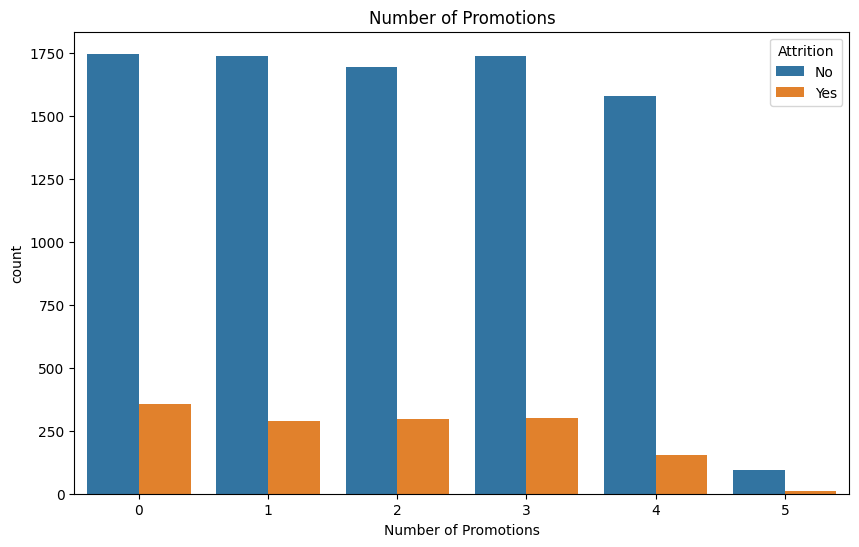

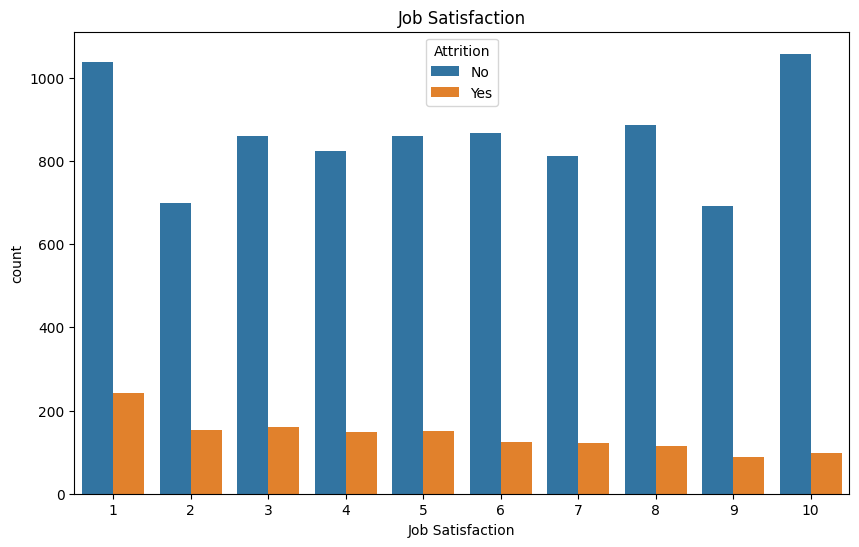

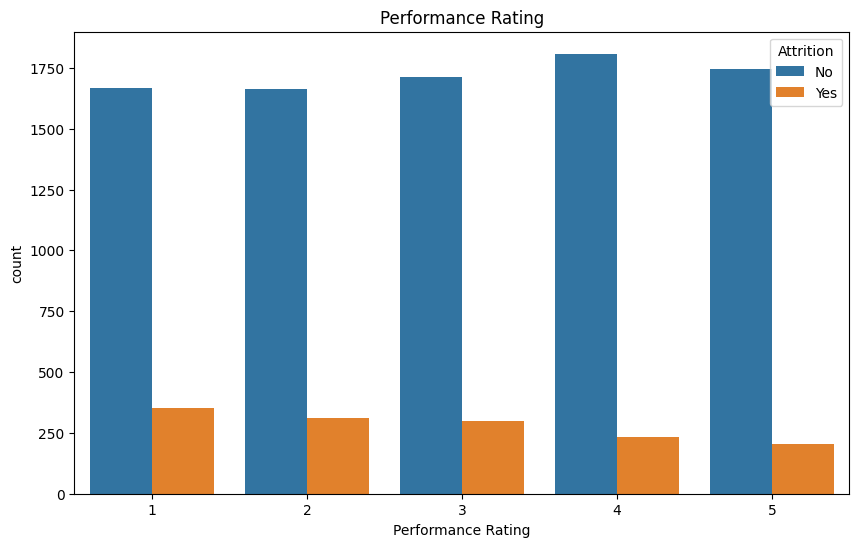

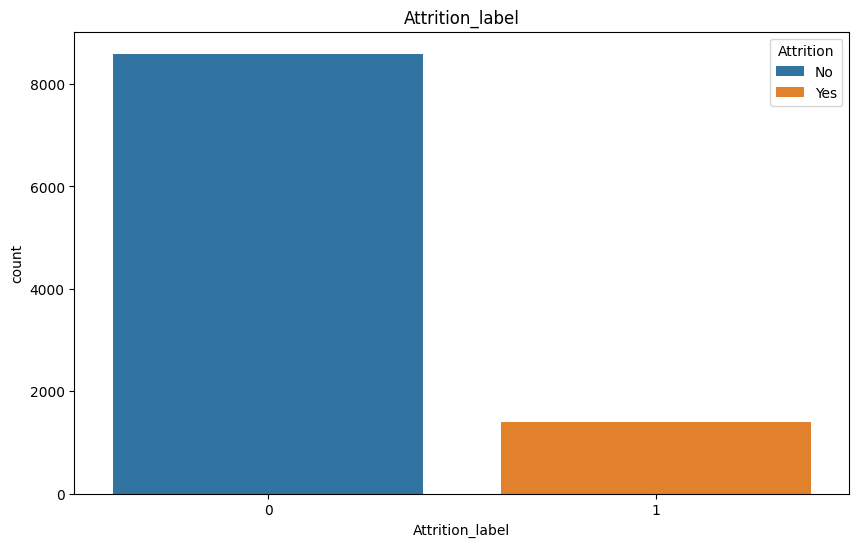

In [59]:
num_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
disc_num_feature=[feature for feature in num_feature if len(df[feature].unique())<25]
for feature in disc_num_feature:
    print(feature,len(df[feature].unique()))
# disc_num_feature is a list of discrete numerical feature names
for feature in disc_num_feature:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df['Attrition'])
    plt.title(feature)
    plt.show()

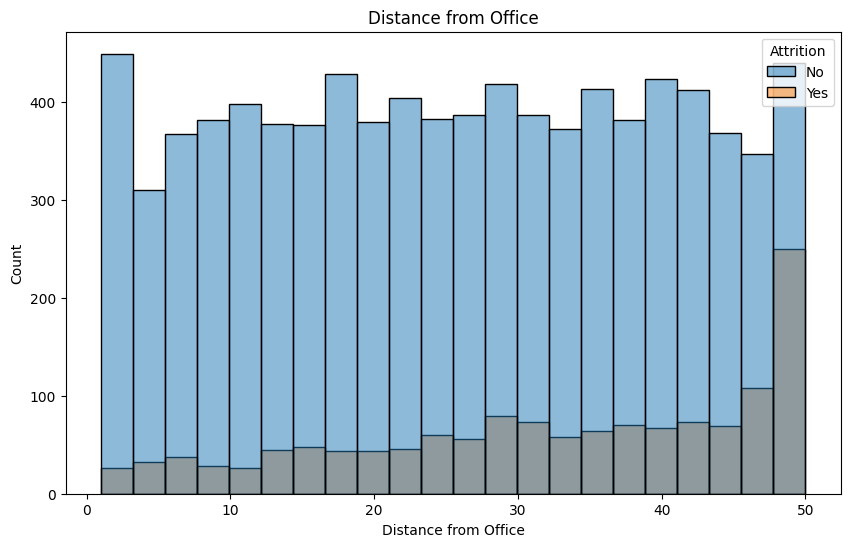

In [67]:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=df['Distance from Office'], hue=df['Attrition'])
    plt.title('Distance from Office')
    plt.show()

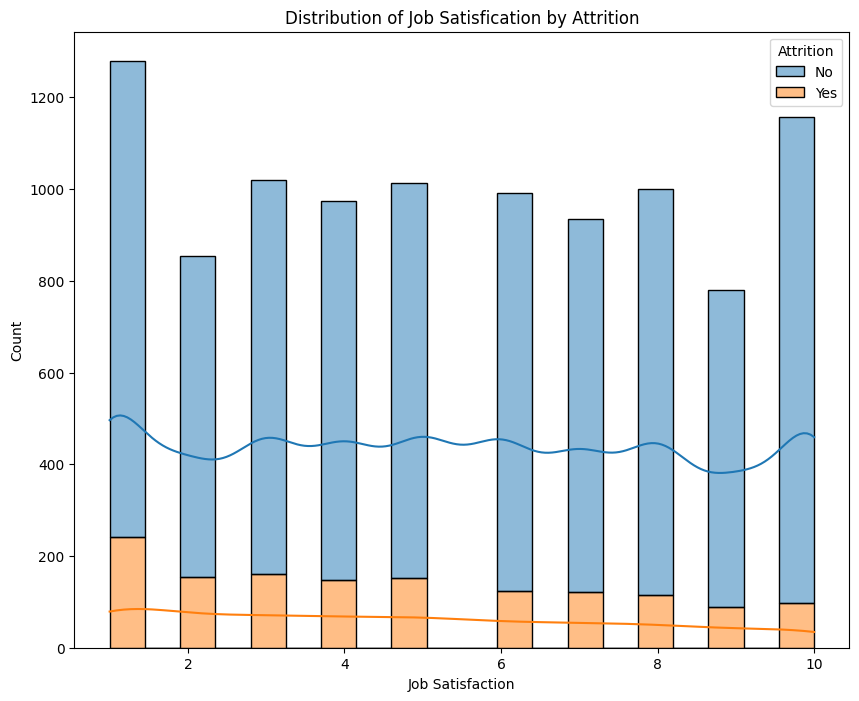

In [84]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Job Satisfaction', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Job Satisfication by Attrition')
plt.show()

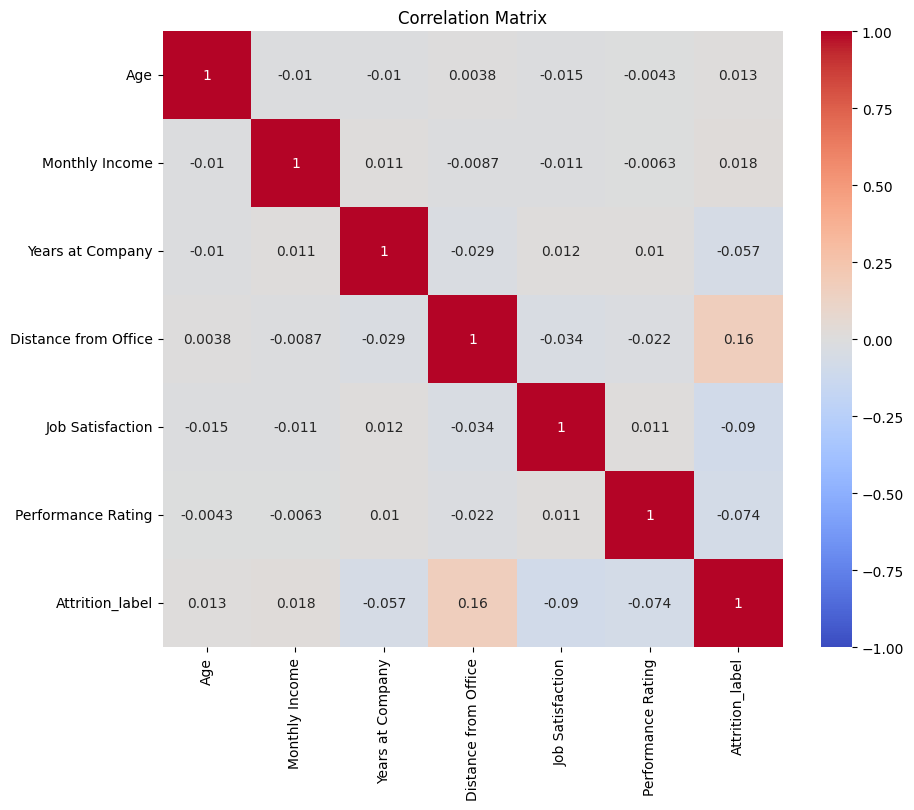

In [20]:
# build a correlation matrix to test correlation between each variables
correlation_matrix = df[['Age','Monthly Income','Years at Company', 'Distance from Office','Job Satisfaction','Performance Rating','Attrition_label']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Check the percentage of 'High-valued customer' VS 'Low value customer'
employee_type = df['Attrition_label'].value_counts(normalize=True)

# Print the class distribution
print(employee_type)

Attrition_label
0    0.8597
1    0.1403
Name: proportion, dtype: float64


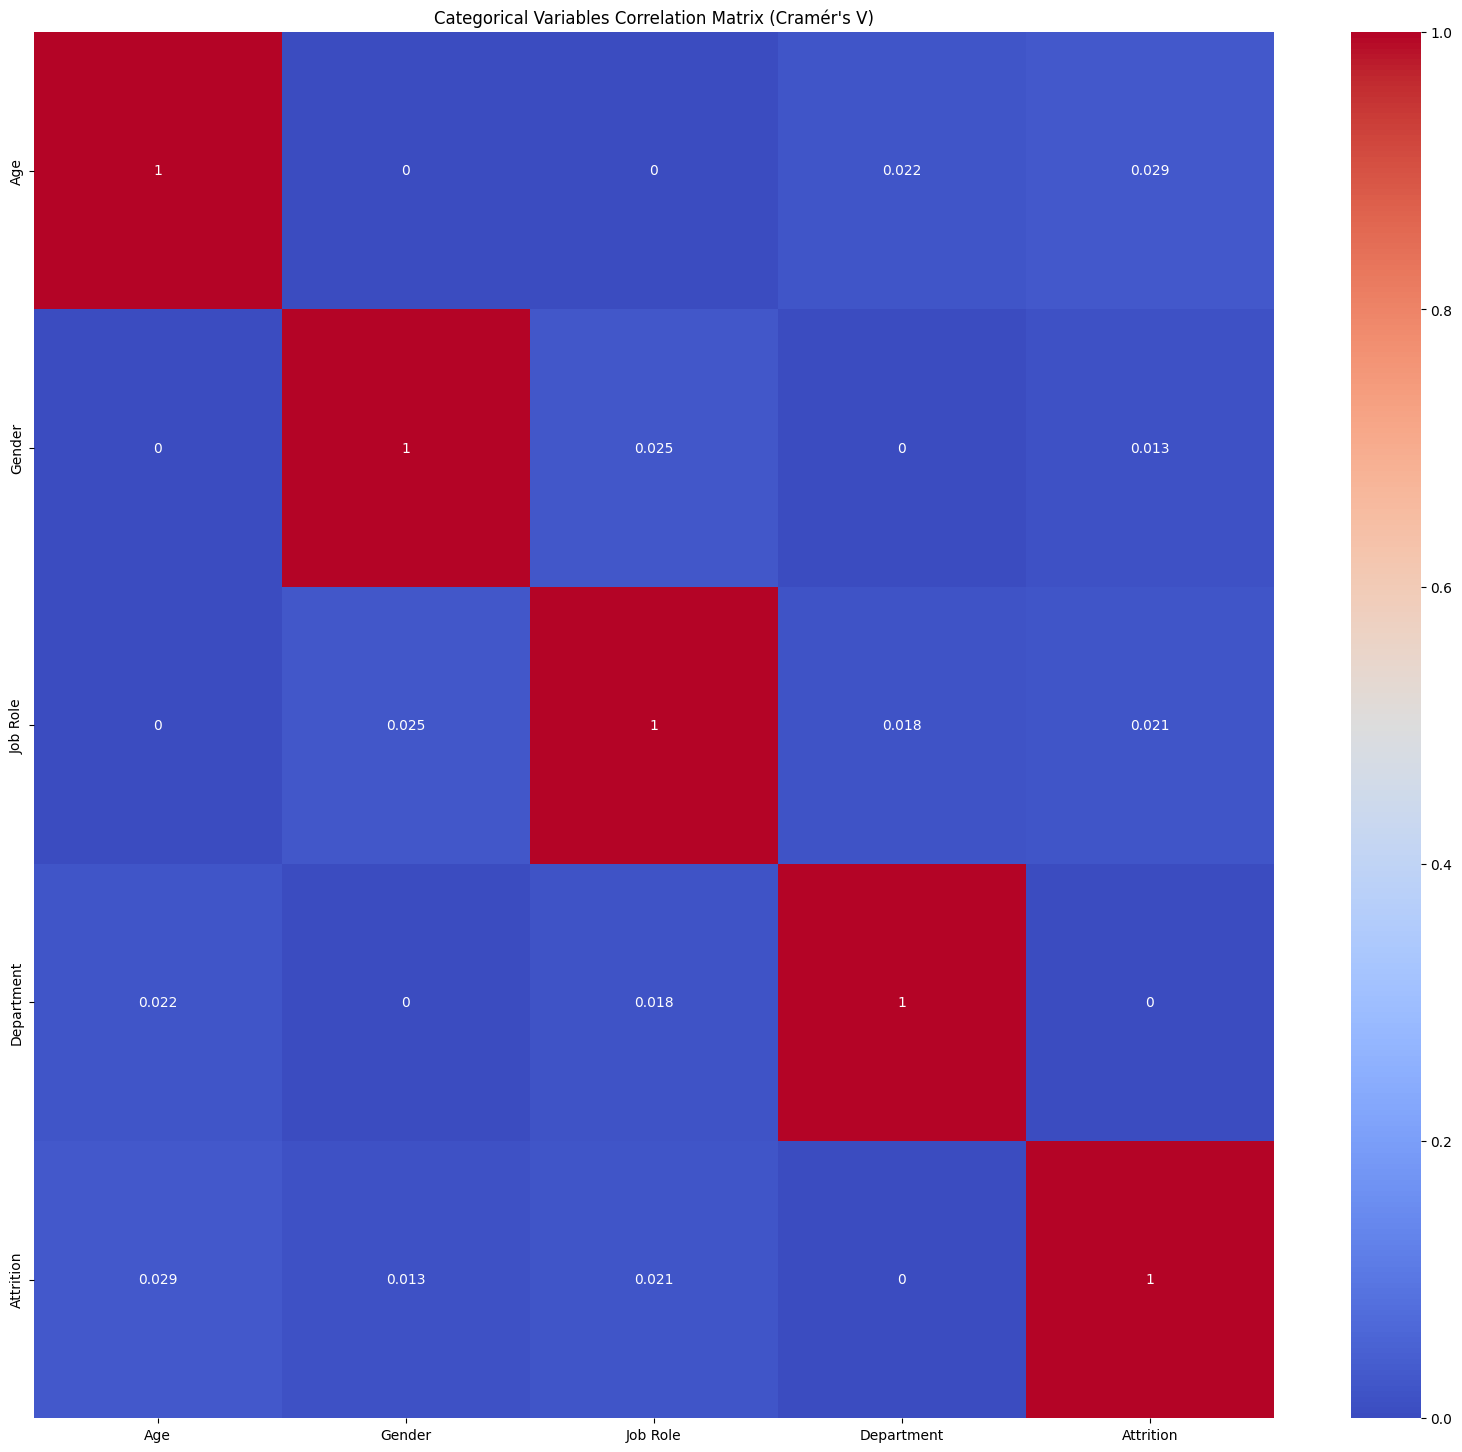

In [14]:
def cramers_v(confusion_matrix):
    """Calculate Cramér's V for the given confusion matrix."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()  # Get total number of observations
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1) if n > 1 else 0)
    rcorr = r - ((r-1)**2)/(n-1) if n > 1 else r
    kcorr = k - ((k-1)**2)/(n-1) if n > 1 else k
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
# Select the categorical variables that you want to analyze
categorical_cols = ['Age','Gender','Job Role', 'Department','Attrition']


# Clean data to remove missing values
clean_df = df.dropna(subset=categorical_cols)

# Clean data to remove missing values
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(clean_df[col1], clean_df[col2])
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert the data type to floating-point
corr_matrix = corr_matrix.astype(float)

# Visual correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Categorical Variables Correlation Matrix (Cramér\'s V)')
plt.show()

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [85]:
y = df['Attrition_label']
X = df[['Age','Monthly Income','Years at Company', 'Last Raise Percentage','Number of Promotions','Distance from Office','Job Satisfaction','Performance Rating','Gender','Job Role', 'Department']]
# Identify numerical and categorical columns
numerical_cols = ['Last Raise Percentage','Number of Promotions','Age','Monthly Income','Years at Company', 'Distance from Office','Job Satisfaction','Performance Rating']
categorical_cols = ['Gender','Job Role', 'Department']
# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [86]:
from sklearn.metrics import f1_score, make_scorer
weighted_f1_scorer = make_scorer(f1_score, average='weighted')

In [87]:
from sklearn.metrics import f1_score, make_scorer
# Test 3 models with cross validation to see which ones work best for this data
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt1 = DecisionTreeClassifier()
# cross validation to determine in general which model works best for the given problem
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring=weighted_f1_scorer, cv=5)
knn_scores = cross_val_score(knn, X_train, y_train, scoring=weighted_f1_scorer, cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring=weighted_f1_scorer, cv=5)
dt1_score = cross_val_score(dt1, X_train, y_train, scoring=weighted_f1_scorer, cv=5)
# High F1 score means better model
print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))
print(np.mean(dt1_score))

0.795564157133893
0.7945662914497411
0.7968773993457817
0.7690370067438794


In [52]:
log1 = logreg.fit(X_train,y_train)
knn1 = knn.fit(X_train,y_train)
nb1 = nb.fit(X_train,y_train)

pred_log1 = log1.predict(X_test)
pred_knn1 = knn1.predict(X_test)
pred_nb1 = nb1.predict(X_test)

In [37]:
# Calculate and print the separate metrics
accuracy = accuracy_score(y_test, pred_knn1)
precision = precision_score(y_test, pred_knn1, average='weighted')
recall = recall_score(y_test, pred_knn1, average='weighted')
f1 = f1_score(y_test, pred_knn1, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.85
Precision: 0.7847207947927373
Recall: 0.85
F1 Score: 0.8040822392865989


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
print(classification_report(y_test, pred_knn1))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1724
           1       0.28      0.05      0.09       276

    accuracy                           0.85      2000
   macro avg       0.57      0.52      0.50      2000
weighted avg       0.78      0.85      0.80      2000



In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, X_train, y_train, scoring='f1', cv=5)
print(np.mean(dt_score))

0.22022071860867118


In [103]:
params = {'max_depth':[2,3,4,5,6,7,8]
          , 'min_samples_split': [8,10,15,20],
           'min_samples_leaf': [4, 8, 10, 20]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dt, params, cv=5,verbose=1, scoring= weighted_f1_scorer)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [4, 8, 10, 20],
                         'min_samples_split': [8, 10, 15, 20]},
             scoring=make_scorer(f1_score, response_method='predict', average=weighted),
             verbose=1)

In [104]:
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best F1 score: {best_f1_score:.4f}')

Best parameters: {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 15}
Best F1 score: 0.8169


In [109]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=20, min_samples_split=15,random_state=123)
dt = dt.fit(X_train, y_train)

In [110]:
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(X_train, y_train)

# Evaluating the model
# Make predictions on the test set
y_pred_dt = best_dt.predict(X_test)

# Evaluate the Logistic Regression model(Lower F1 score than Logistic Regression model, so not choose)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt= f1_score(y_test, y_pred_dt, average='weighted')
roc_auc_dt = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
# Print the evaluation metrics
print(f'Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'ROC AUC Score: {roc_auc_dt:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.8475
Precision: 0.7865
Recall: 0.8475
F1 Score: 0.8054
ROC AUC Score: 0.6285

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1724
           1       0.28      0.07      0.11       276

    accuracy                           0.85      2000
   macro avg       0.58      0.52      0.51      2000
weighted avg       0.79      0.85      0.81      2000



<Figure size 800x600 with 0 Axes>

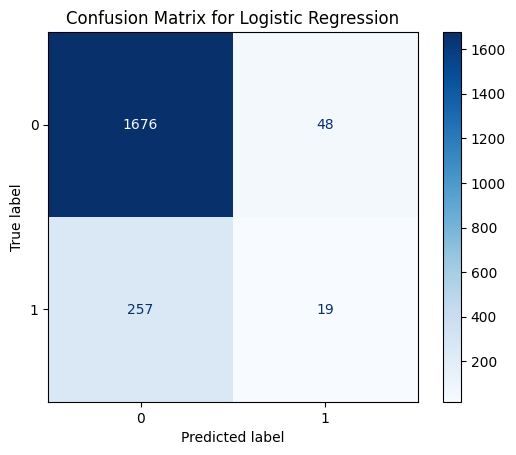

In [112]:
cm_logreg = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=best_knn.classes_)
cm_display_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

<Figure size 1000x600 with 0 Axes>

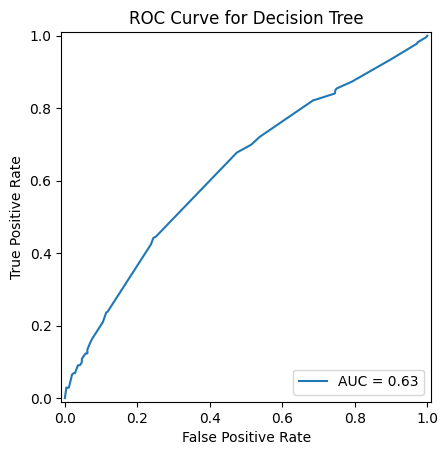

In [113]:
#Print ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
roc_display_logreg = RocCurveDisplay(fpr=fpr_dt, tpr=tpr_dt, roc_auc=roc_auc_dt)
roc_display_logreg.plot()
plt.title('ROC Curve for Decision Tree')
plt.show()

In [88]:
# Try to optimize KNN Model
# build our pipeline

# Define the parameter grid for KNN
param_grid = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 25, 35, 45],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring= weighted_f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best F1 score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best F1 score: {best_f1_score:.4f}')

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best F1 score: 0.7968


In [91]:
# Apply the best combination of hyperparameter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluating the model
# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test)

# Evaluate the Logistic Regression model(Lower F1 score than Logistic Regression model, so not choose)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn= f1_score(y_test, y_pred_knn, average='weighted')
roc_auc_knn = roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1])
# Print the evaluation metrics
print(f'Accuracy: {accuracy_knn:.4f}')
print(f'Precision: {precision_knn:.4f}')
print(f'Recall: {recall_knn:.4f}')
print(f'F1 Score: {f1_knn:.4f}')
print(f'ROC AUC Score: {roc_auc_knn:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.8495
Precision: 0.7470
Recall: 0.8495
F1 Score: 0.7927
ROC AUC Score: 0.5673

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1724
           1       0.04      0.00      0.01       276

    accuracy                           0.85      2000
   macro avg       0.45      0.49      0.46      2000
weighted avg       0.75      0.85      0.79      2000



<Figure size 800x600 with 0 Axes>

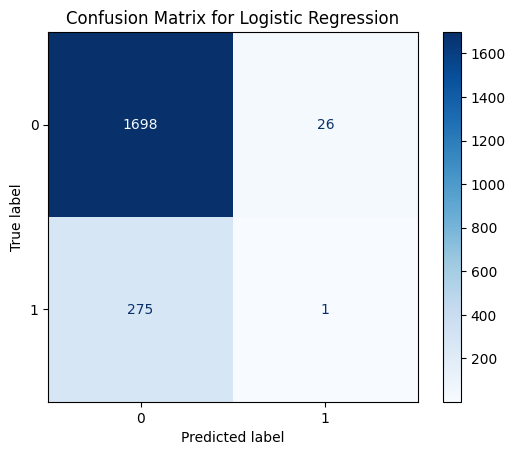

In [92]:
# Generate the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
cm_display_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=best_knn.classes_)
cm_display_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt


<Figure size 1000x600 with 0 Axes>

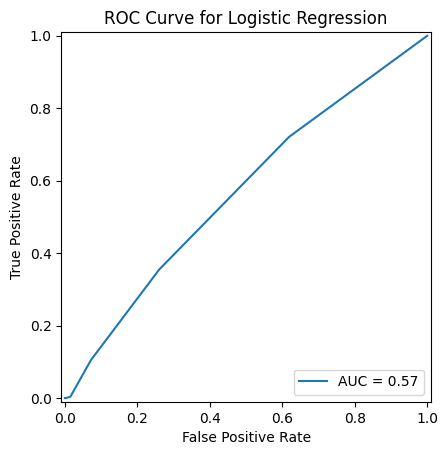

In [94]:
# Generate the ROC curve
fpr_logreg, tpr_logreg, thresholds_logred = roc_curve(y_test, best_knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
roc_display_logreg = RocCurveDisplay(fpr=fpr_logreg, tpr=tpr_logreg, roc_auc=roc_auc_knn)
roc_display_logreg.plot()
plt.title('ROC Curve for Logistic Regression')
plt.show()

In [95]:
# Improve logreg
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [97]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Perform GridSearchCV
logreg = LogisticRegression(max_iter=1000)
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring= weighted_f1_scorer, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and the best F1 score
best_params_logreg = grid_search_logreg.best_params_
best_f1_score_logreg = grid_search_logreg.best_score_

print(f'Best parameters for Logistic Regression: {best_params_logreg}')
print(f'Best F1 score for Logistic Regression: {best_f1_score_logreg:.4f}')

d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
       

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.7946


In [98]:
# Apply the best combination of hyperparameter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
best_logreg = LogisticRegression(**best_params_logreg, max_iter=1000)
best_logreg.fit(X_train, y_train)

# Evaluating the model
# Make predictions on the test set
y_pred_logreg = best_logreg.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
roc_auc_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])

# Print the evaluation metrics
print(f'Accuracy: {accuracy_logreg:.4f}')
print(f'Precision: {precision_logreg:.4f}')
print(f'Recall: {recall_logreg:.4f}')
print(f'F1 Score: {f1_logreg:.4f}')
print(f'ROC AUC Score: {roc_auc_logreg:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.8610
Precision: 0.7429
Recall: 0.8610
F1 Score: 0.7976
ROC AUC Score: 0.6590

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1724
           1       0.00      0.00      0.00       276

    accuracy                           0.86      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.74      0.86      0.80      2000

